In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
from vit_keras import vit, utils
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow import keras
import pandas as pd
from tensorflow.keras.preprocessing import image

2023-11-06 15:50:27.737322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 15:50:27.826063: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 15:50:28.319413: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kannika/miniconda3/envs/tf/lib/
2023-11-06 15:50:28.319485: W tensorflow/compile

# Thalas 2 Classes

## Load model

In [71]:
fold = 6

In [72]:
model_dir = f"/media/tohn/HDD/rheology2023/ViTModel/Classification/Blood_Viscosity/HN-NBL_classes/fold{fold}/R1/models/ViTb32_thalas2classesClass_fold{fold}_R1.h5"
#model_dir = '/media/tohn/HDD/rheology2023/ViTModel/Classification/Blood_Viscosity/HN-NBL_classes/fold1/R1/models/ViTb32_1Class_fold1_R1.h5'
print(f"Load model : => {model_dir}")
model = keras.models.load_model(model_dir)
height = width = model.input_shape[1]
print(height, width)
model.summary()

Load model : => /media/tohn/HDD/rheology2023/ViTModel/Classification/Blood_Viscosity/HN-NBL_classes/fold6/R1/models/ViTb32_thalas2classesClass_fold6_R1.h5
384 384
Model: "ViT_BloodClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 384, 384, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 12, 12, 768)       2360064   
                                                                 
 reshape (Reshape)           (None, 144, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 145, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 145, 768)         111360    
 (AddPositionEmbs)                                               
                     

# DATA

In [73]:
df_2dFFT = pd.read_csv("/home/kannika/code/Rheology2023/Rheology_Blood/DataBlood_Viscosity_2dFFTdataset_3channels_6Fold_split2class-ver2.csv")
train_2dFFT = df_2dFFT[df_2dFFT['fold']!=fold].reset_index(drop=True)
print("Fold Train set", set(train_2dFFT['fold']))
print(train_2dFFT.shape)

test_2dFFT = df_2dFFT[df_2dFFT['fold']==fold].reset_index(drop=True)
print("Fold Test set", set(test_2dFFT['fold']))
print(test_2dFFT.shape)

test_2dFFT.head()

Fold Train set {1, 2, 3, 4, 5}
(223, 19)
Fold Test set {6}
(45, 19)


,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary,MCV,MCH,Hb
0,144,157.0,157.0,157.0,401.0,401.0,NBL10_D0_30HZ_20XINF_UWELL_25651129_142354_dt2...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,NBL10_D0_30HZ_20XINF_UWELL_25651129_142354,SSD_Backup,NBL,NBL10,Normal,6,"[2, 5, 7]",0.0,83.5,25.8,13.0
1,145,164.0,164.0,164.0,396.0,396.0,NBL10_D0_30HZ_20XINF_UWELL_25651129_141005_dt2...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,NBL10_D0_30HZ_20XINF_UWELL_25651129_141005,SSD_Backup,NBL,NBL10,Normal,6,"[2, 5, 7]",0.0,83.5,25.8,13.0
2,146,167.0,167.0,167.0,399.0,399.0,NBL10_D0_30HZ_20XINF_UWELL_25651129_141915_dt2...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,NBL10_D0_30HZ_20XINF_UWELL_25651129_141915,SSD_Backup,NBL,NBL10,Normal,6,"[2, 5, 7]",0.0,83.5,25.8,13.0
3,147,168.0,168.0,168.0,403.0,403.0,NBL10_D0_30HZ_20XINF_UWELL_25651129_142839_dt2...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,NBL10_D0_30HZ_20XINF_UWELL_25651129_142839,SSD_Backup,NBL,NBL10,Normal,6,"[2, 5, 7]",0.0,83.5,25.8,13.0
4,148,172.0,172.0,172.0,398.0,398.0,NBL10_D0_30HZ_20XINF_UWELL_25651129_141653_dt2...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,NBL10_D0_30HZ_20XINF_UWELL_25651129_141653,SSD_Backup,NBL,NBL10,Normal,6,"[2, 5, 7]",0.0,83.5,25.8,13.0


In [74]:
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]
   # return result[0][1:]

In [75]:
img_path = test_2dFFT['image_path'].tolist()   ## path to list
### Predict
pred_list= []
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i]) 
    pred_list.append(predict)

1/1 [==============================] - 0s 41ms/step


In [76]:
print(len(pred_list))
pred_list

45


[array([0.0921418], dtype=float32),
 array([0.08900467], dtype=float32),
 array([0.090064], dtype=float32),
 array([0.09036998], dtype=float32),
 array([0.09150641], dtype=float32),
 array([0.23178516], dtype=float32),
 array([0.9041534], dtype=float32),
 array([0.09040463], dtype=float32),
 array([0.08895481], dtype=float32),
 array([0.08850463], dtype=float32),
 array([0.08830775], dtype=float32),
 array([0.09435091], dtype=float32),
 array([0.09552746], dtype=float32),
 array([0.08832866], dtype=float32),
 array([0.08952433], dtype=float32),
 array([0.09034181], dtype=float32),
 array([0.0896818], dtype=float32),
 array([0.08986551], dtype=float32),
 array([0.09009822], dtype=float32),
 array([0.09003289], dtype=float32),
 array([0.0889747], dtype=float32),
 array([0.9067052], dtype=float32),
 array([0.90648115], dtype=float32),
 array([0.9064885], dtype=float32),
 array([0.90731394], dtype=float32),
 array([0.9070848], dtype=float32),
 array([0.9076523], dtype=float32),
 array([0.9

In [77]:
_pred_label = []
for m in pred_list:
    #print(m)
    for n in range(len(m)):
        #print(m[n])
        if m[n] >= 0.5:  ## Sigmoid(Z) >= 0.5, y=1
            #pred_label.append(1)
            _pred_label.append("HN") ## เป็นโรค
        else:
             _pred_label.append("NBL") ## ไม่เป็นโรค

In [78]:
print(len(_pred_label))
_pred_label

45


['NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'HN',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'NBL',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN']

In [79]:
test_2dFFT["category"] = _pred_label
test_2dFFT.head(3)

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary,MCV,MCH,Hb,category
0,144,157.0,157.0,157.0,401.0,401.0,NBL10_D0_30HZ_20XINF_UWELL_25651129_142354_dt2...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,NBL10_D0_30HZ_20XINF_UWELL_25651129_142354,SSD_Backup,NBL,NBL10,Normal,6,"[2, 5, 7]",0.0,83.5,25.8,13.0,NBL
1,145,164.0,164.0,164.0,396.0,396.0,NBL10_D0_30HZ_20XINF_UWELL_25651129_141005_dt2...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,NBL10_D0_30HZ_20XINF_UWELL_25651129_141005,SSD_Backup,NBL,NBL10,Normal,6,"[2, 5, 7]",0.0,83.5,25.8,13.0,NBL
2,146,167.0,167.0,167.0,399.0,399.0,NBL10_D0_30HZ_20XINF_UWELL_25651129_141915_dt2...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,NBL10_D0_30HZ_20XINF_UWELL_25651129_141915,SSD_Backup,NBL,NBL10,Normal,6,"[2, 5, 7]",0.0,83.5,25.8,13.0,NBL


# Evaluation

In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = test_2dFFT['classes'].array
pred = test_2dFFT['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 95.55555555555556%
              precision    recall  f1-score   support

          HN       0.96      0.96      0.96        24
         NBL       0.95      0.95      0.95        21

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Confusion matrix

Text(0.5, 21.249999999999993, 'Predicted label')

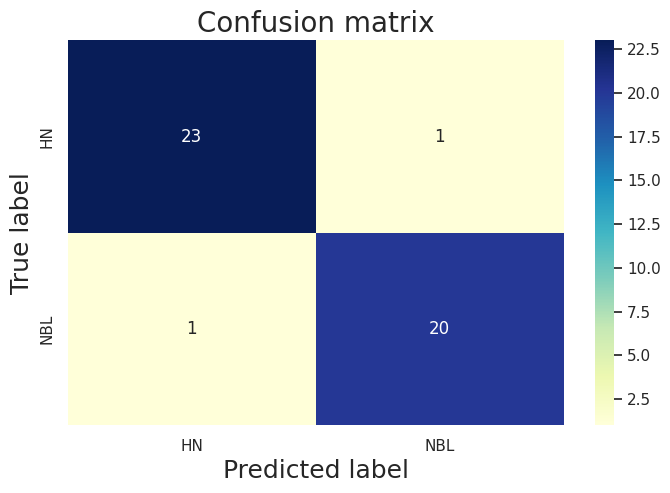

In [81]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## Confusion matrix

In [82]:
cm

array([[23,  1],
       [ 1, 20]])

In [83]:
tn, fp, fn, tp = confusion_matrix(act, pred).ravel()
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Positive (TP):", tp)

True Negative (TN): 23
False Positive (FP): 1
False Negative (FN): 1
True Positive (TP): 20
